In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
yield_data = pd.read_csv("data/edelweiss_Ge_yield.txt", skiprows=1, \
                       names=['Erecoil', 'Erecoil_err', 'Yield', 'Yield_err'], \
                       delim_whitespace=True)

# convert yield data from percent to fraction
yield_data['Yield'] = yield_data['Yield']/100.0
yield_data['Yield_err'] = yield_data['Yield_err']*yield_data['Yield']/100.0
print (yield_data)

   Erecoil  Erecoil_err  Yield  Yield_err
0       94            3  0.347   0.013186
1       80            2  0.328   0.012792
2       76            2  0.301   0.021070
3      123            4  0.337   0.012469
4      104            3  0.314   0.013188
5      100            3  0.314   0.013816


(10, 40)

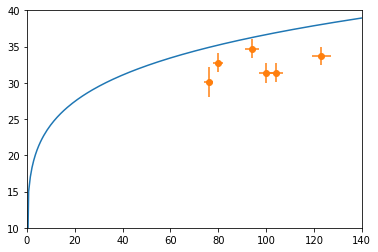

In [3]:
Erecoil_arr = np.linspace(0, 140, 200)

plt.plot(Erecoil_arr, 16*np.power(Erecoil_arr, 0.18))
plt.errorbar(yield_data['Erecoil'], 100*yield_data['Yield'], xerr=yield_data['Erecoil_err'], yerr=100*yield_data['Yield_err'], fmt='o')
plt.xlim(0, 140)
plt.ylim(10, 40)

In [4]:
import sys
sys.path.append('../python/')
from EdwRes import *

def log_likelihood(theta, yield_data):
    A, B = theta
    x_yield, y_yield, yerr_yield = yield_data['Erecoil'], yield_data['Yield'], yield_data['Yield_err']
    
    model_yield = Q_avg(x_yield, A, B)
    sigma2_yield = yerr_yield**2
    
    return -0.5*(np.sum((y_yield-model_yield)**2/sigma2_yield + np.log(2*np.pi*sigma2_yield)))

In [7]:
from scipy.optimize import minimize
np.random.seed(42)

# start at about the minimum
A, B = 0.16, 0.18

nll = lambda *args: -log_likelihood(*args)
initial = np.array([A, B]) + 0.001*np.random.randn(2)
soln = minimize(nll, initial, method='Nelder-Mead', args=(yield_data), options={'adaptive':True})
print (soln)
A_fit, B_fit = soln.x

 final_simplex: (array([[0.23598113, 0.07086512],
       [0.23607428, 0.07078224],
       [0.23603611, 0.07081325]]), array([-17.07117362, -17.07117357, -17.0711735 ]))
           fun: -17.071173619864105
       message: 'Optimization terminated successfully.'
          nfev: 114
           nit: 60
        status: 0
       success: True
             x: array([0.23598113, 0.07086512])


<ErrorbarContainer object of 3 artists>

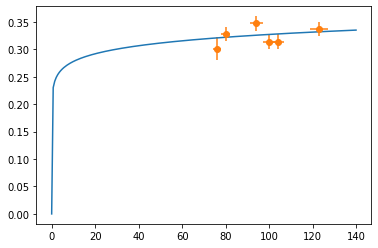

In [9]:
Erecoil_arr = np.linspace(0, 140, 200)

plt.plot(Erecoil_arr, A_fit*np.power(Erecoil_arr, B_fit))
plt.errorbar(yield_data['Erecoil'], yield_data['Yield'], xerr=yield_data['Erecoil_err'], yerr=yield_data['Yield_err'], fmt='o')
#plt.xlim(0, 140)
#plt.ylim(10, 40)